# Task1

# Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. 
We will use a package called BeautifulSoup to collect the data from the web. 
Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, 
we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. 
Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#https://www.airlinequality.com/
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Horrible service from boar...
1,Not Verified | My wife and I are very disappo...
2,Not Verified | We flew BA between Heathrow an...
3,Not Verified | Absolutely disgusted with BA. ...
4,Not Verified | Took a trip to Nashville with m...


In [5]:
df.to_csv("C:\\Users\\jafer\\Desktop\\BA_reviews.csv")

# Congratulations! Now you have your dataset for this task!
The loops above collected 1000 reviews by iterating through the paginated pages on the website.
However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. 
For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning
Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. 
The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [6]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [7]:
#create a dataframe from csv file in cwd (Current Working Directory)

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)
df.head()

,reviews
0,✅ Trip Verified | You may never see your ref...
1,Not Verified | Cargo service: that's how I fel...
2,✅ Trip Verified | Inefficient and slow airport...
3,Not Verified | The customer service is one of...
4,"Not Verified | Before my flight, I was forced ..."


## We will also create a column which mentions if the user is verified or not.

In [8]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0       True
1      False
2       True
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

## Cleaning Reviews 
We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [9]:
#for lemmatization of words we will use nltk library
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import nltk
nltk.download('wordnet')
#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# add the corpus to the original dataframe

df['corpus'] = corpus
df.head()

,reviews,verified,corpus
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...


In [12]:
df.dtypes

reviews     object
verified      bool
corpus      object
dtype: object

# Check for null Values

In [13]:
df.isnull().value_counts()

reviews  verified  corpus
False    False     False     1000
Name: count, dtype: int64

In [14]:
df.shape

(1000, 3)

In [15]:
#resetting the index
df.reset_index(drop=True)

,reviews,verified,corpus
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...
...,...,...,...
995,✅ Trip Verified | Amsterdam to London on 15th...,True,amsterdam london th april arrived hour flight ...
996,✅ Trip Verified | Istanbul to London. My firs...,True,istanbul london first flight economy new neo a...
997,✅ Trip Verified | I had some difficulty from ...,True,difficulty start initial booking website repea...
998,✅ Trip Verified | London to Dusseldorf. No fr...,True,london dusseldorf free drink food pretty norma...


In [16]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

There are many words that does not set the idea of whether the review is positive or negative. 
For example words like "passenger", "flight", etc. 
does not add conlcusive value hence we can include them in stopwords list.

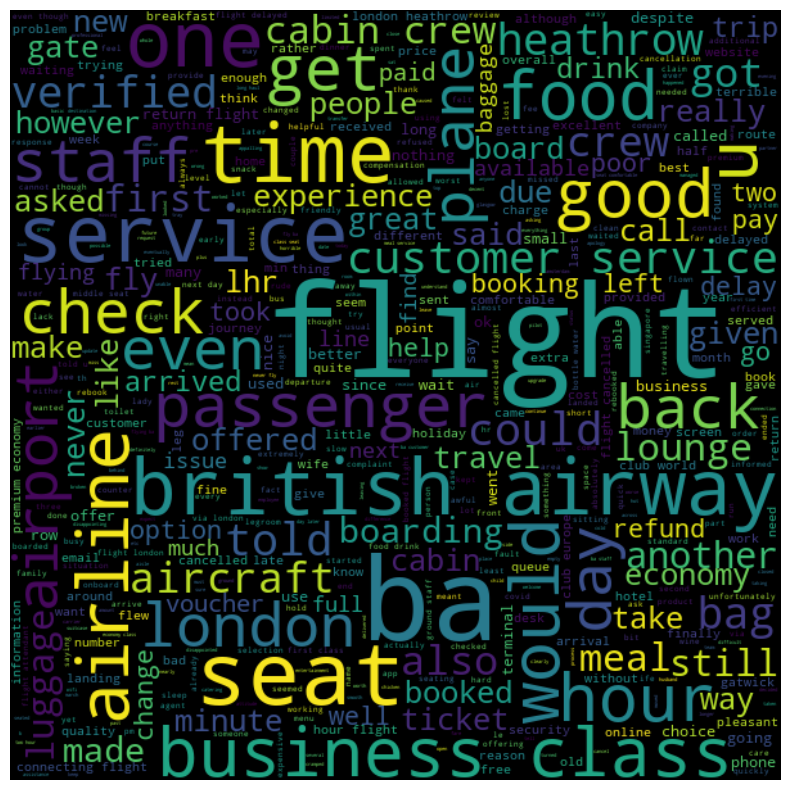

In [17]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. 
For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

# Word Frequency

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'class'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'food'),
  Text(7, 0, 'business'),
  Text(8, 0, 'good'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'cabin'),
  Text(11, 0, 'customer'),
  Text(12, 0, 'check'),
  Text(13, 0, 'day'),
  Text(14, 0, 'told'),
  Text(15, 0, 'airport'),
  Text(16, 0, 'experience'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'bag'),
  Text(19, 0, 'verified')])

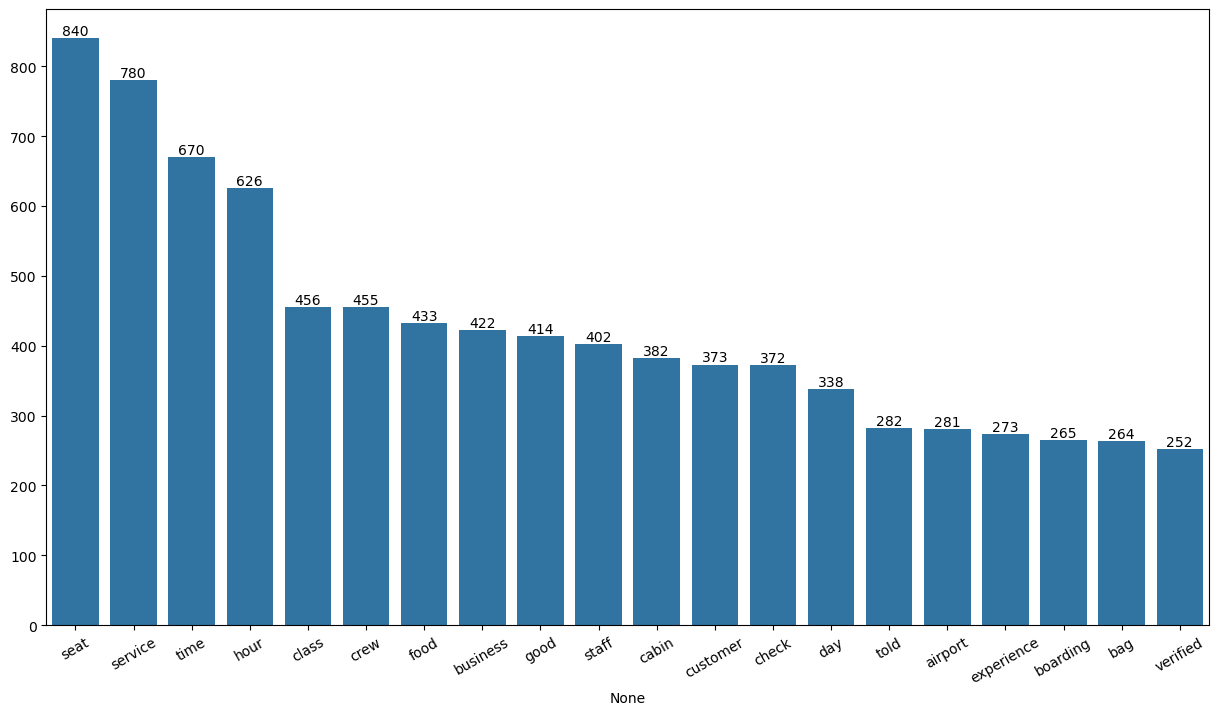

In [19]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here.
We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service.
However, we still do not know is how they are expressing about each of this service. 
To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

<Axes: >

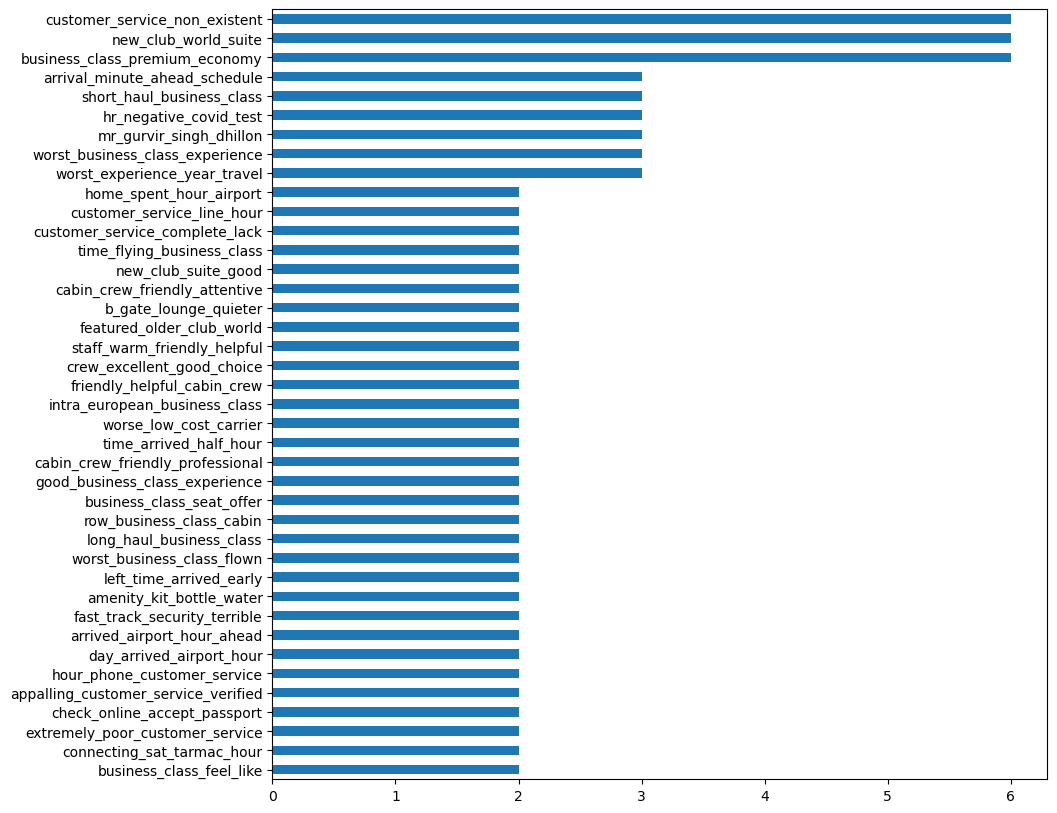

In [20]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [21]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [26]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ----------------------------- ---------- 92.2/126.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


# Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [28]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,verified,corpus,Cleaned Reviews
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...,Trip Verified You may never see your refund I...
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...,Not Verified Cargo service that s how I felt i...
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...,Trip Verified Inefficient and slow airport op...
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...,Not Verified The customer service is one of th...
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...,Not Verified Before my flight I was forced by ...


# Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [29]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jafer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,verified,corpus,Cleaned Reviews,POS tagged
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...,Trip Verified You may never see your refund I...,"[(Trip, n), (Verified, n), (may, None), (never..."
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...,Not Verified Cargo service that s how I felt i...,"[(Verified, n), (Cargo, n), (service, n), (fel..."
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...,Trip Verified Inefficient and slow airport op...,"[(Trip, n), (Verified, n), (Inefficient, n), (..."
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...,Not Verified The customer service is one of th...,"[(Verified, v), (customer, n), (service, n), (..."
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...,Not Verified Before my flight I was forced by ...,"[(Verified, v), (flight, n), (forced, v), (gro..."


In [31]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,verified,corpus,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...,Trip Verified You may never see your refund I...,"[(Trip, n), (Verified, n), (may, None), (never...",Trip Verified may never see refund cancel re...
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...,Not Verified Cargo service that s how I felt i...,"[(Verified, n), (Cargo, n), (service, n), (fel...",Verified Cargo service felt upper deck suppo...
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...,Trip Verified Inefficient and slow airport op...,"[(Trip, n), (Verified, n), (Inefficient, n), (...",Trip Verified Inefficient slow airport opera...
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...,Not Verified The customer service is one of th...,"[(Verified, v), (customer, n), (service, n), (...",Verified customer service one bad ever see s...
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...,Not Verified Before my flight I was forced by ...,"[(Verified, v), (flight, n), (forced, v), (gro...",Verified flight force ground staff check new...


In [32]:
df[['reviews','Lemma']]

,reviews,Lemma
0,✅ Trip Verified | You may never see your ref...,Trip Verified may never see refund cancel re...
1,Not Verified | Cargo service: that's how I fel...,Verified Cargo service felt upper deck suppo...
2,✅ Trip Verified | Inefficient and slow airport...,Trip Verified Inefficient slow airport opera...
3,Not Verified | The customer service is one of...,Verified customer service one bad ever see s...
4,"Not Verified | Before my flight, I was forced ...",Verified flight force ground staff check new...
...,...,...
995,✅ Trip Verified | Amsterdam to London on 15th...,Trip Verified Amsterdam London th April arri...
996,✅ Trip Verified | Istanbul to London. My firs...,Trip Verified Istanbul London first flight E...
997,✅ Trip Verified | I had some difficulty from ...,Trip Verified difficulty start initial book ...
998,✅ Trip Verified | London to Dusseldorf. No fr...,Trip Verified London Dusseldorf free drink f...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,verified,corpus,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | You may never see your ref...,True,may never see refund cancelled return flight s...,Trip Verified You may never see your refund I...,"[(Trip, n), (Verified, n), (may, None), (never...",Trip Verified may never see refund cancel re...,0.5007,Positive
1,Not Verified | Cargo service: that's how I fel...,False,verified cargo service felt upper deck suppose...,Not Verified Cargo service that s how I felt i...,"[(Verified, n), (Cargo, n), (service, n), (fel...",Verified Cargo service felt upper deck suppo...,0.9485,Positive
2,✅ Trip Verified | Inefficient and slow airport...,True,inefficient slow airport operation resting lau...,Trip Verified Inefficient and slow airport op...,"[(Trip, n), (Verified, n), (Inefficient, n), (...",Trip Verified Inefficient slow airport opera...,-0.5423,Negative
3,Not Verified | The customer service is one of...,False,verified customer service one worst ever seen ...,Not Verified The customer service is one of th...,"[(Verified, v), (customer, n), (service, n), (...",Verified customer service one bad ever see s...,-0.6769,Negative
4,"Not Verified | Before my flight, I was forced ...",False,verified flight forced ground staff check new ...,Not Verified Before my flight I was forced by ...,"[(Verified, v), (flight, n), (forced, v), (gro...",Verified flight force ground staff check new...,-0.6309,Negative


In [34]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    470
Negative    421
Neutral     109
Name: count, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x1f563d29d00>,
 [Text(0.10351914875166042, 1.0951181606757014, 'Positive'),
  Text(-0.465228052314237, -0.9967762333341932, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')],
 [Text(0.056464990228178406, 0.5973371785503826, '47.0%'),
  Text(-0.2537607558077656, -0.5436961272731962, '42.1%'),
  Text(0.8006492579540364, -0.28541332438702105, '10.9%')])

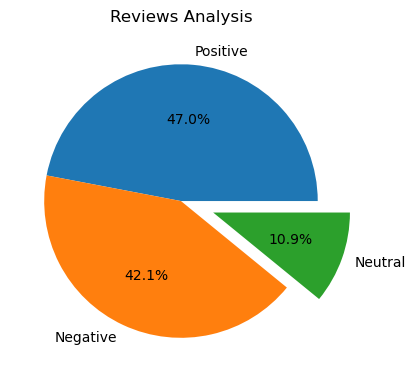

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)